https://wikidocs.net/44249

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dfc615k/ko_sample.csv
/kaggle/input/dfc615k/ko_data.csv
/kaggle/input/naverdata3/naverfile3.csv


In [2]:
naverdata = pd.read_csv("/kaggle/input/dfc615k/ko_data.csv", sep=",", encoding="ms949")
naversample = pd.read_csv("/kaggle/input/dfc615k/ko_sample.csv", sep=",", encoding="ms949")
moviecomments = pd.read_csv("/kaggle/input/naverdata3/naverfile3.csv", sep=",")

In [3]:
moviecomments = moviecomments[moviecomments['POINT'].isin(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])]
moviecomments
moviecomments['POINT'] = moviecomments['POINT'].astype(str).astype(int)
moviecomments['Y'] = -1
moviecomments.loc[moviecomments['POINT']>=9, "Y"] = 1
moviecomments.loc[moviecomments['POINT']<=4, "Y"] = 0
moviecomments = moviecomments[moviecomments['Y']>=0]
moviecomments.head()

,Unnamed: 0,ID,TITLE,POINT,COMMENT,Y
0,0,16920178,도미노,1,엉성한 편집과 액션.. OST 땜에 긴박감이란건 안 느껴지고 여주와 죽은 남자 불륜...,0
1,1,16920177,해리 포터와 아즈카반의 죄수,10,NaN,1
2,2,16920176,결백,10,최고 ㅠㅠㅠ 진짜 너무 짱이였어요,1
3,3,16920175,아이언 마스크: 용패지미,1,짱깨 벌레 새끼들에게서 무슨 유가 나겠는고,0
5,5,16920173,클레멘타인,10,저는 뇌종양을 앓고 있던 암 투병 환자였습니다. 이 영화를 보고 뇌가 사라졌습니다.,1


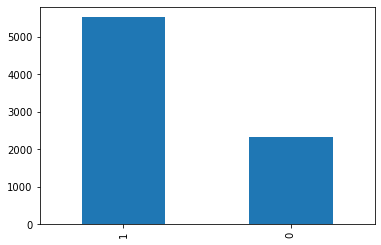

In [4]:
moviecomments['Y'].value_counts().plot(kind = 'bar')

In [5]:
print(moviecomments.groupby('Y').size().reset_index(name = 'count'))


   Y  count
0  0   2325
1  1   5521


코멘트 NULL여부 판단하여 제거

In [6]:
print(moviecomments.isnull().sum())

Unnamed: 0      0
ID              0
TITLE           0
POINT           0
COMMENT       971
Y               0
dtype: int64


In [7]:
moviecomments = moviecomments.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(moviecomments.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [8]:
print(len(moviecomments))

6875


In [9]:
moviecomments.head()

,Unnamed: 0,ID,TITLE,POINT,COMMENT,Y
0,0,16920178,도미노,1,엉성한 편집과 액션.. OST 땜에 긴박감이란건 안 느껴지고 여주와 죽은 남자 불륜...,0
2,2,16920176,결백,10,최고 ㅠㅠㅠ 진짜 너무 짱이였어요,1
3,3,16920175,아이언 마스크: 용패지미,1,짱깨 벌레 새끼들에게서 무슨 유가 나겠는고,0
5,5,16920173,클레멘타인,10,저는 뇌종양을 앓고 있던 암 투병 환자였습니다. 이 영화를 보고 뇌가 사라졌습니다.,1
6,6,16920172,범털,3,이 영화 봤더니 욕도 심하고 이 영화 15세 이상 관람가가 아니라 청소년 관람불가 아님,0


In [10]:
naverdata.head()

,Id,Sentence
0,0,정말 많이 울었던 영화입니다.
1,1,시간 낭비예요.
2,2,포스터를 저렇게밖에 만들지 못했던 제작자의 소심함에 침을 뱉고 싶다.
3,3,지금 봐도 재미있는 영화!!! 코믹과 감동!!! 그리고 요리!!!
4,4,이걸 영화로 만드는 거야?얼마나 가는지 보자.


In [11]:
moviecomments['COMMENT'] = moviecomments['COMMENT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
naverdata['Sentence'] = naverdata['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [12]:
moviecomments['COMMENT'].replace('', np.nan, inplace=True)
print(moviecomments.isnull().sum())

Unnamed: 0    0
ID            0
TITLE         0
POINT         0
COMMENT       1
Y             0
dtype: int64


In [13]:
naverdata['Sentence'].replace('', np.nan, inplace=True)

naverdata['Sentence'].replace(np.nan, '', inplace=True)


print(naverdata.isnull().sum())

Id          0
Sentence    0
dtype: int64


In [14]:
moviecomments = moviecomments.dropna(how = 'any')
print(len(moviecomments))

6874


In [15]:
data1 = moviecomments['COMMENT'].tolist()
data2 = naverdata['Sentence'].tolist()
data = [*data1, *data2]
size = len(data1)
len(data1), len(data2), len(data)

(6874, 11187, 18061)

### 토근화

In [16]:
#!pip install --upgrade pip

In [17]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 50.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 4.9 MB/s  eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.0
    Uninstalling beautifulsoup4-4.9.0:
      Successfully uninstalled beautifulsoup4-4.9.0


불용어 제거

In [18]:
from konlpy.tag import Okt
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [19]:
#moviecomments = moviecomments.reset_index(drop=True)

In [20]:
data[:5]

['엉성한 편집과 액션  땜에 긴박감이란건 안 느껴지고 여주와 죽은 남자 불륜 관계는 도대체 왜 집어넣었는지 이해 불가다 브라이언 드 팔마는 납치되고 브리앙 지 빠우마가 대신 감독했다해도 믿을 수준인 처참한 영화 ',
 '최고 ㅠㅠㅠ 진짜 너무 짱이였어요 ',
 '짱깨 벌레 새끼들에게서 무슨 유가 나겠는고 ',
 '저는 뇌종양을 앓고 있던 암 투병 환자였습니다 이 영화를 보고 뇌가 사라졌습니다 ',
 '이 영화 봤더니 욕도 심하고 이 영화 세 이상 관람가가 아니라 청소년 관람불가 아님 ']

In [21]:
%%time
X = []

moviecomments["WORDS"] = ''

# for i in range(0, len(moviecomments)):
#     sentence = moviecomments.loc[i, "COMMENT"]
#     sentence = okt.morphs(sentence, stem=True) # 토큰화
#     X.append([word for word in sentence if not word in stopwords]) # 불용어 제거    

for i in range(0, len(data)):
    sentence = str(data[i])
    try:        
        sentence = okt.morphs(sentence, stem=True) # 토큰화
    except:
        print('Error', i)
    X.append([word for word in sentence if not word in stopwords]) # 불용어 제거    
    

CPU times: user 1min 28s, sys: 867 ms, total: 1min 29s
Wall time: 1min 12s


In [22]:
len(X)

18061

정수 인코딩

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [24]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 15520
등장 빈도가 2번 이하인 희귀 단어의 수: 9569
단어 집합에서 희귀 단어의 비율: 61.65592783505155
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.568802688646477


In [25]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5952


In [26]:
len(X)

18061

In [27]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X)

X_train = tokenizer.texts_to_sequences(X[:5000])
X_test = tokenizer.texts_to_sequences(X[5000:size])
X_last = tokenizer.texts_to_sequences(X[size:])

In [28]:
y_train = np.array(moviecomments['Y'][:5000])
y_test = np.array(moviecomments['Y'][5000:size])
y_last = np.array(moviecomments['Y'][size:])

In [29]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [30]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 87.22


In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_last = pad_sequences(X_last, maxlen = max_len)


In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [35]:
len(X_train), len(y_train)

(5000, 5000)

In [36]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
66/67 [============================>.] - ETA: 0s - loss: 0.5345 - acc: 0.7280
Epoch 00001: val_acc improved from -inf to 0.80600, saving model to best_model.h5
67/67 [==============================] - 4s 56ms/step - loss: 0.5333 - acc: 0.7287 - val_loss: 0.4540 - val_acc: 0.8060
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.3194 - acc: 0.8645
Epoch 00002: val_acc improved from 0.80600 to 0.83500, saving model to best_model.h5
67/67 [==============================] - 3s 48ms/step - loss: 0.3194 - acc: 0.8645 - val_loss: 0.3936 - val_acc: 0.8350
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.2522 - acc: 0.9003
Epoch 00003: val_acc did not improve from 0.83500
67/67 [==============================] - 3s 49ms/step - loss: 0.2522 - acc: 0.9003 - val_loss: 0.4015 - val_acc: 0.8300
Epoch 4/15
66/67 [============================>.] - ETA: 0s - loss: 0.2004 - acc: 0.9210
Epoch 00004: val_acc did not improve from 0.83500
67/67 [==========

In [37]:
len(X_test), len(y_test)

(1874, 1874)

In [38]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

59/59 [==============================] - 1s 9ms/step - loss: 0.4174 - acc: 0.8394

 테스트 정확도: 0.8394


In [47]:
Xtestprediction = loaded_model.predict(X_test)

In [50]:
len(Xtestprediction), len(y_test)

(1874, 1874)

In [70]:
def to_bool(s):
    return 1 if s > 0.5 else 0

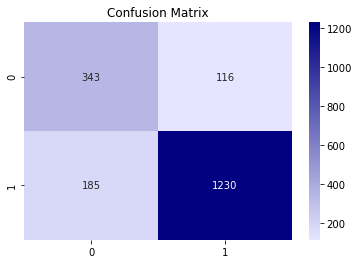

In [73]:
from sklearn.metrics import confusion_matrix
import pylab as plt
import seaborn as sns

cm = confusion_matrix([ to_bool(x) for x in Xtestprediction], y_test)
sns.heatmap(cm, cmap=sns.light_palette(
    "navy", as_cmap=True), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [39]:
predicted = loaded_model.predict(X_last)

In [40]:
len(predicted)

11187

In [41]:
naversample['Predicted'] =  [ to_bool(x) for x in predicted]

In [42]:
naversample[['Id', 'Predicted']].to_csv("/kaggle/working/output1_lstm.csv", sep=",", encoding="ms949", index=False)
